# Computation of $\varepsilon_{\text{iso}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The value of $\omega_g$ is retrieved from the previous calculations.
The $\omega$ range is defined.

In [2]:
omega_g = 1.338e15
stop = np.log10(omega_g)
omega = np.logspace(12,stop,1000)

The following function is used to determine the modulus of the resulting vector following the 3 spatial components. 
The values used to compute $\varepsilon_\text{iso}$ are then computed.

In [3]:
def resulting(x) : 
    """
    @pre : x is an array of complex or real float values
    @post : returns the number resulting to the components of the array
    """
    return np.sqrt(sum(x**2))

In [4]:
#Values are obtained from the Excel file provided on moodle
epsilonInfinity1 = 19.17402283496171
epsilonInfinity2 = 22.09805938253293
epsilonInfinity3 = 20.60710234103419
epsilonInfinity = resulting(np.array([epsilonInfinity1,epsilonInfinity2,epsilonInfinity3]))

f11 = 4.213279900760202 
f12 = 1.961693284797713
f13 = 0.007966945581503451
f1 = resulting(np.array([f11,f12,f13]))
omegaTO11 = 79231717132503.97
omegaTO12 = 57563096713280.8
omegaTO13 = 49033016471727.84
omegaTO1 = resulting(np.array([omegaTO11,omegaTO12,omegaTO13]))
gamma11 = 151929351721.5274
gamma12 = 151947673655.9077
gamma13 = 156461516099.8209
gamma1 = resulting(np.array([gamma11,gamma12,gamma13]))

f22 = 2.318085089104123
f23 = 1.935048918661783
f2 = resulting(np.array([f22,f23]))
omegaTO22 = 70373122741473.44
omegaTO23 = 62330594312793.54
omegaTO2 = resulting(np.array([omegaTO22,omegaTO23]))
gamma22 = 151959123549.7535
gamma23 = 151954274514.8117
gamma2 = resulting(np.array([gamma22,gamma23]))

f32 = 3.803690401550578
f33 = 6.832435225656633
f3 = resulting(np.array([f32,f33]))
omegaTO32 = 73806724238431.17
omegaTO33 = 77733154461442.81
omegaTO3 = resulting(np.array([omegaTO32,omegaTO33]))
gamma32 = 151930325428.5151
gamma33 = 151936692746.3015
gamma3 = resulting(np.array([gamma32,gamma33]))

f = np.array([f1,f2,f3])
omegaTO = np.array([omegaTO1,omegaTO2,omegaTO3])
gamma = np.array([gamma1,gamma2,gamma3])

$\varepsilon_\text{iso}$ is found using $$\varepsilon_\text{iso} = \varepsilon_{\infty}+\sum\limits_n\left(f_n\cdot\dfrac{\omega_{TO,n}^2}{\omega_{TO,n}^2-\omega^2-i\omega\gamma_n}\right)$$

In [7]:
somme = np.zeros(1000,dtype='cdouble')
for i in range(3) : 
    somme += f[i]*omegaTO[i]**2/(omegaTO[i]**2-omega**2-(omega*gamma[i])*1j)
epsilonIso = epsilonInfinity + somme

The real and imaginary parts of $\varepsilon_{iso}$ are then plotted versus $\omega$, as well as the modulus.

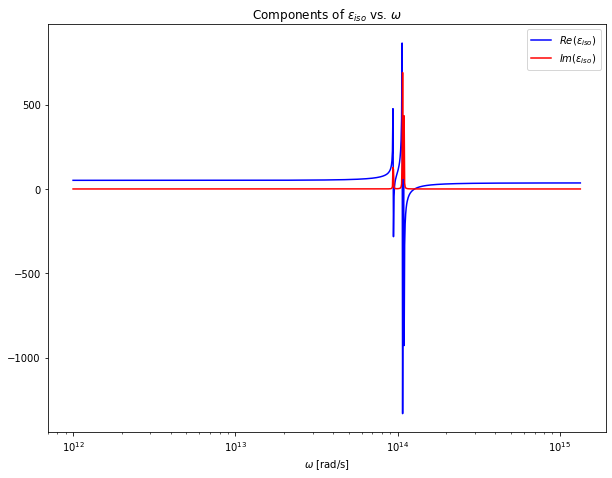

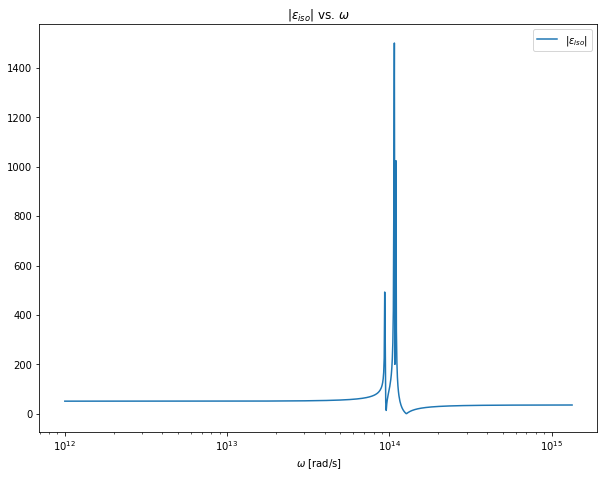

In [8]:
epsilonIsoReal = np.array([x.real for x in epsilonIso])
epsilonIsoImg = np.array([x.imag for x in epsilonIso])
plt.figure(figsize=(10,7.5))
plt.plot(omega,epsilonIsoReal,'-b',label=r'$Re(\epsilon_{iso})$')
plt.plot(omega,epsilonIsoImg,'-r',label=r'$Im(\epsilon_{iso})$')
plt.xscale("log")
plt.legend()
plt.title(r'Components of $\varepsilon_{iso}$ vs. $\omega$')
plt.xlabel(r'$\omega$ [rad/s]')

plt.figure(figsize=(10,7.5))
plt.plot(omega,np.sqrt(epsilonIsoReal**2+epsilonIsoImg**2),label=r'$\vert\epsilon_{iso}\vert$')
plt.legend()
plt.xscale("log")
plt.title(r'$|\varepsilon_{iso}|$ vs. $\omega$')
plt.xlabel(r'$\omega$ [rad/s]')
plt.show()

The range of relevant frequencies are the frequencies where the reflectivity is maximized and the electromagnetic absorption is minimized. The refraction index thus needs to be maximized.

By using the following equations : 
$$n = \dfrac{1}{\sqrt{2}}\left(\varepsilon_1+(\varepsilon_1^2+\varepsilon_2^2)^{\frac{1}{2}}\right)^\frac{1}{2}$$
$$\kappa = \dfrac{1}{\sqrt{2}}\left(-\varepsilon_1+(\varepsilon_1^2+\varepsilon_2^2)^{\frac{1}{2}}\right)^\frac{1}{2}$$
$$\tilde{n} = n + i\kappa$$
it is possible to plot the complex and real refraction indices, as well as the extinction coefficient $\kappa$ : 

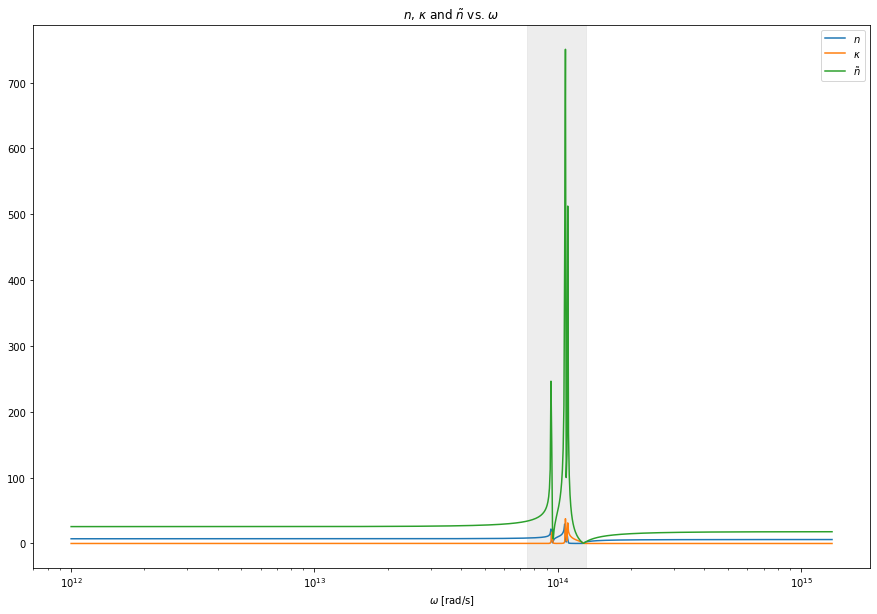

In [10]:
n = 1/(2**(1/2))*(epsilonIsoReal + (epsilonIsoReal**2+epsilonIsoImg**2)**(1/2))**(1/2)
kappa = 1/(2**(1/2))*(-epsilonIsoReal + (epsilonIsoReal**2+epsilonIsoImg**2)**(1/2))**(1/2)
ncomp = (n**2 + kappa**2)**1/2

plt.figure(figsize=(15,10))
plt.plot(omega,n,label=r'$n$')
plt.plot(omega,kappa,label=r'$\kappa$')
plt.plot(omega,ncomp,label=r'$\tilde{n}$')
plt.legend()
plt.xlabel(r'$\omega$ [rad/s]')
plt.title(r'$n$, $\kappa$ and $\tilde{n}$ vs. $\omega$')
plt.xscale('log')

inf = 7.5e13
upper = 1.3e14

plt.axvspan(inf, upper, alpha=0.5, color='#DDDDDD')

The grey area shows the range of frequencies of interest : where the complex refraction index is the higher.
As the extinction coefficient $\kappa$ is the imaginary part of the complex refraction index, it also shows peaks in the region of interest. 